In [ ]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
#Exploratory Data Analysis.

df = pd.read_csv("/content/drive/MyDrive/Data science edyoda/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
print(df["TotalCharges"].isnull().sum())

11


In [ ]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

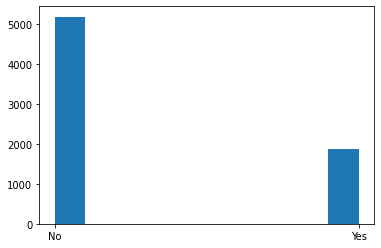

In [ ]:
#check the distribution of the target variable "Churn"

plt.hist(df["Churn"])
plt.show()

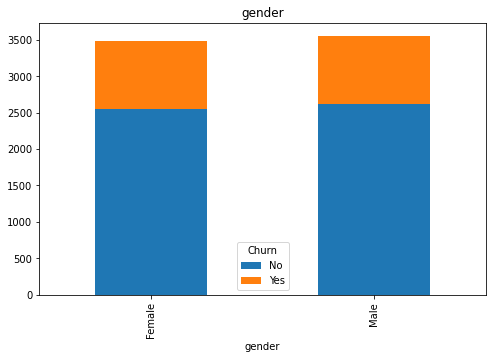

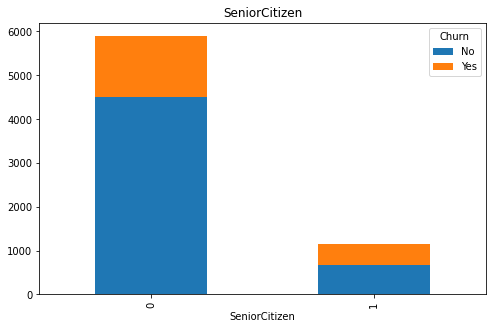

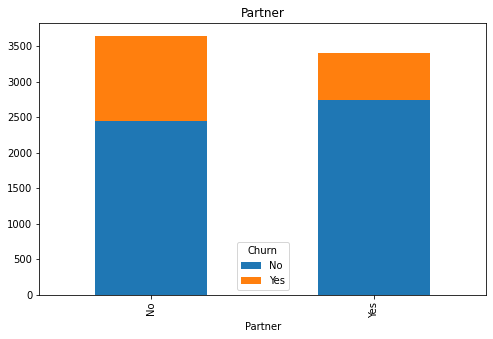

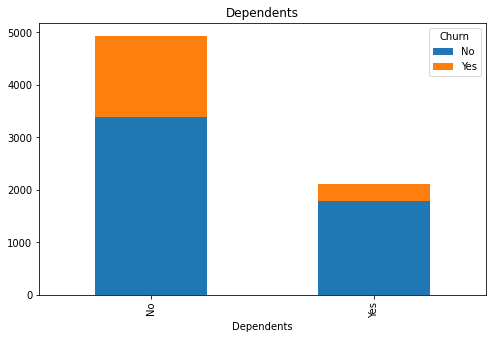

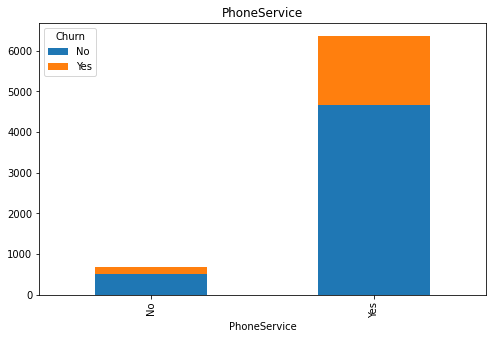

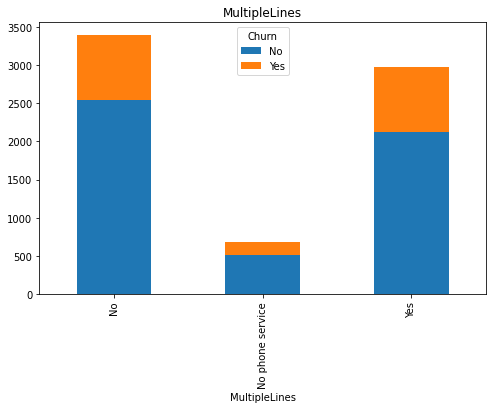

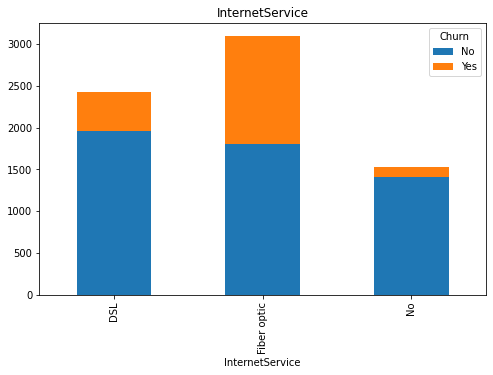

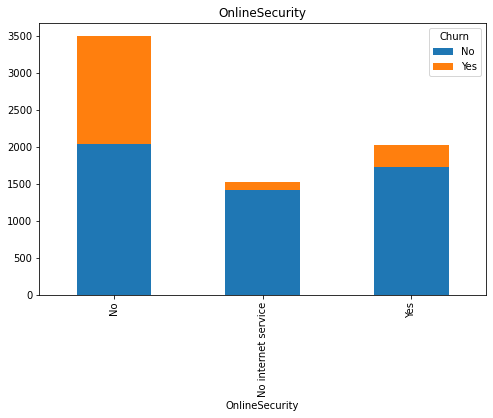

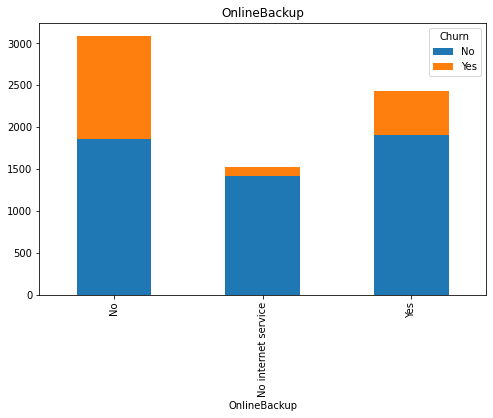

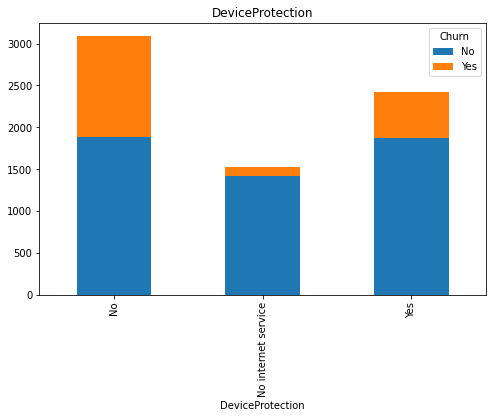

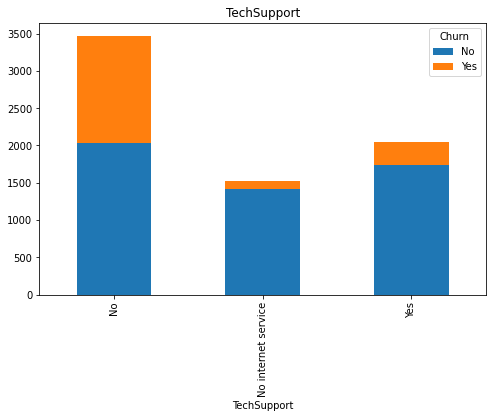

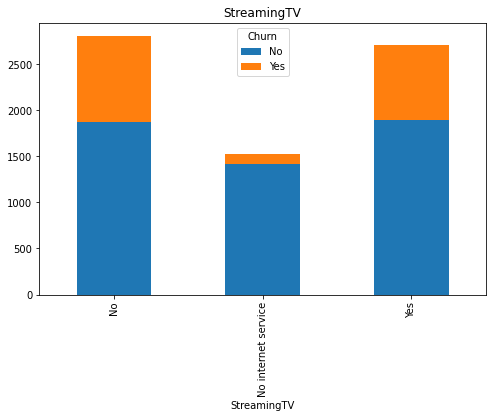

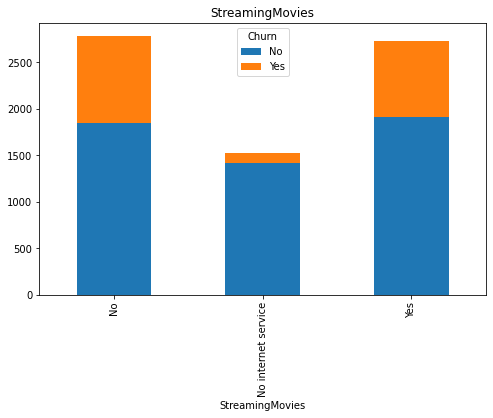

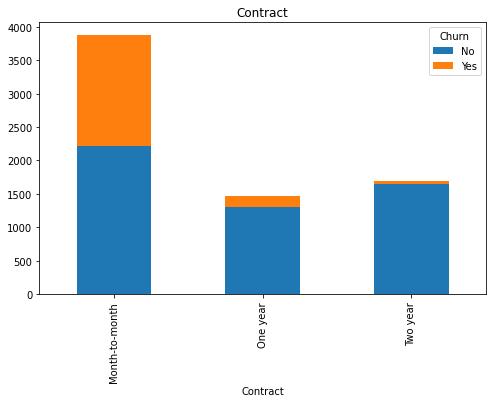

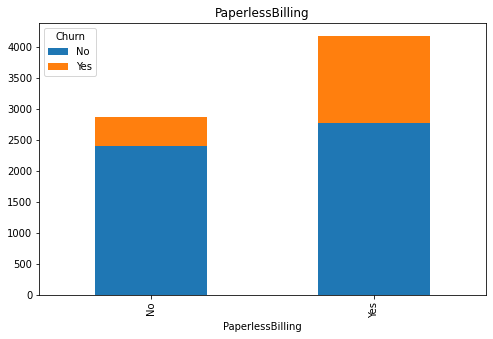

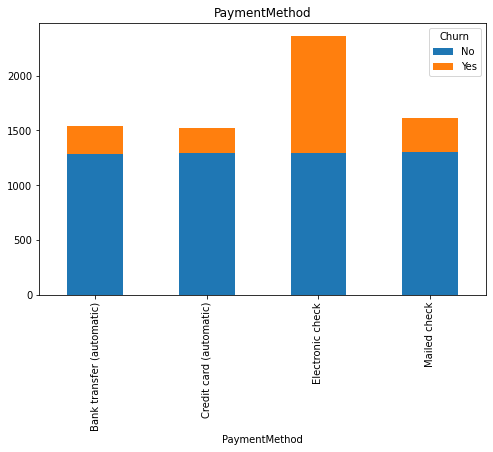

In [ ]:
#dataset is imbalanced, with more customers not churning than churning.

categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
                        "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
                        "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]


for feature in categorical_features:
    fig, ax = plt.subplots(figsize=(8, 5))
    df.groupby([feature, "Churn"]).size().unstack().plot(kind="bar", stacked=True, ax=ax)
    plt.title(feature)
    plt.show()                       

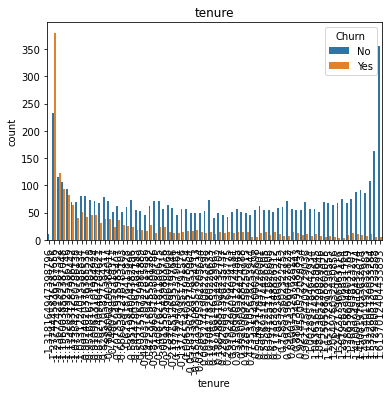

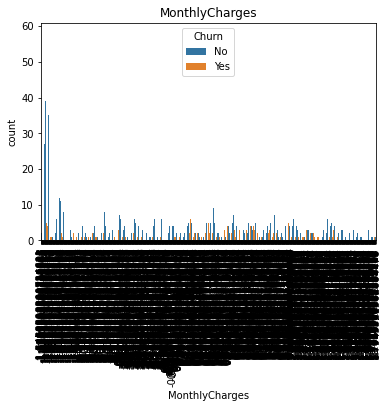

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


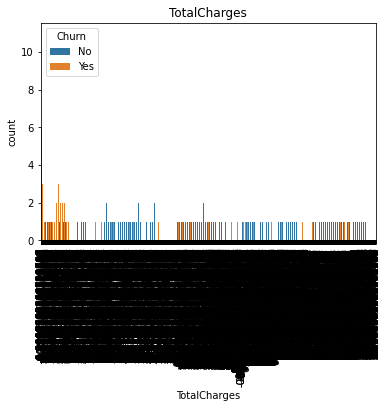

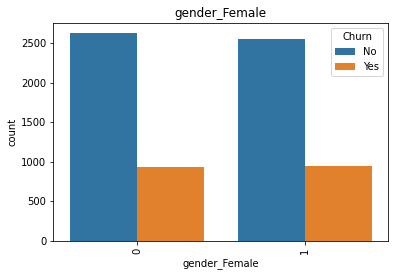

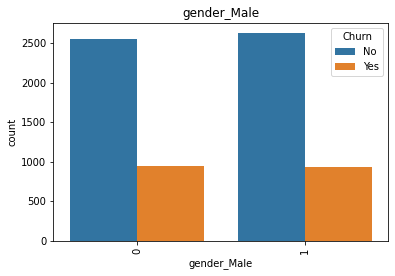

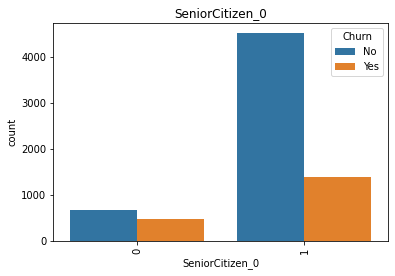

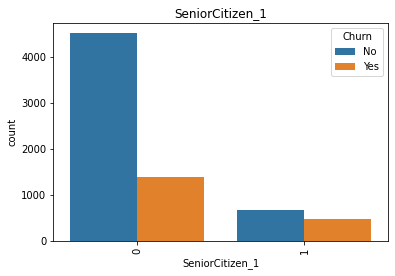

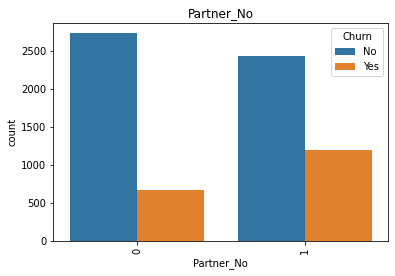

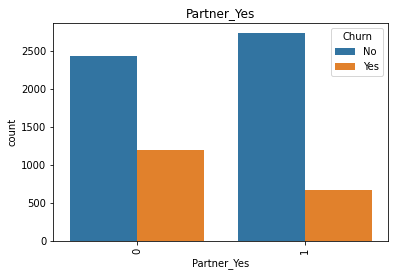

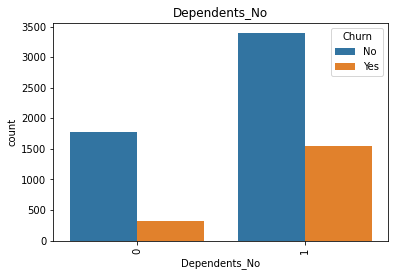

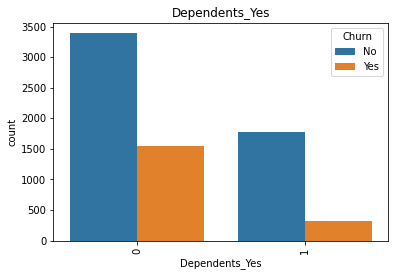

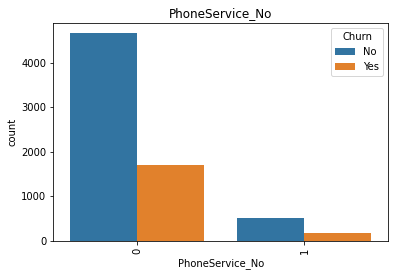

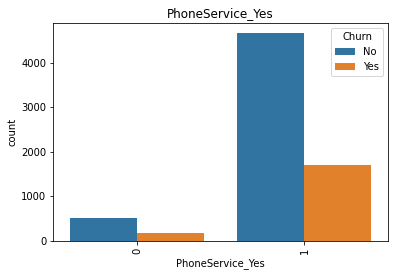

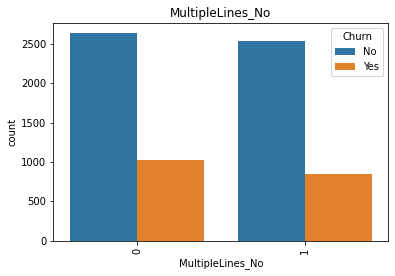

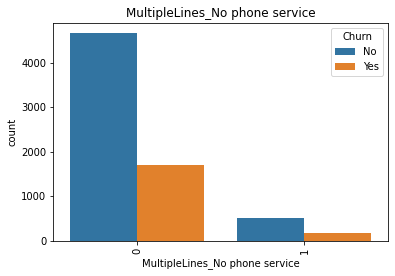

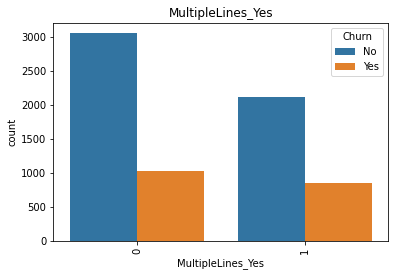

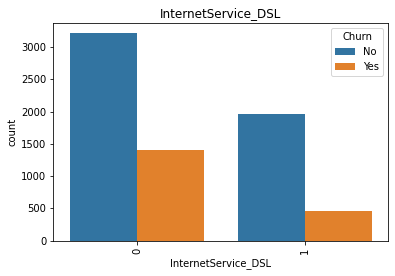

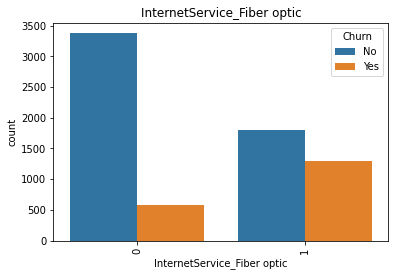

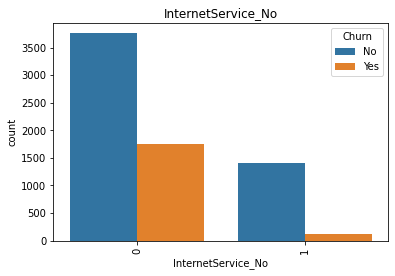

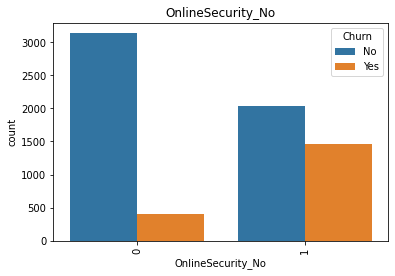

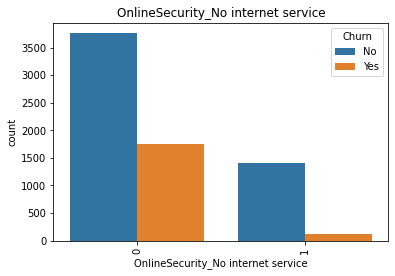

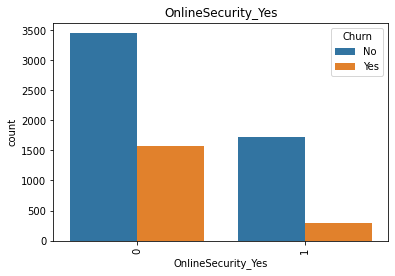

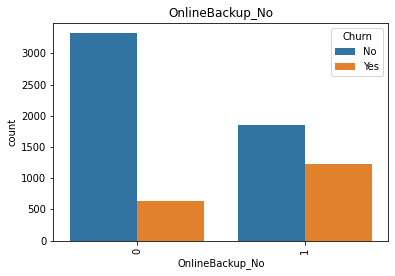

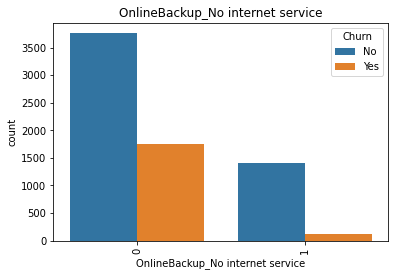

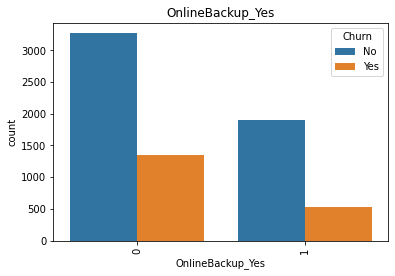

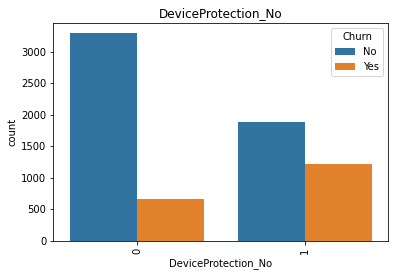

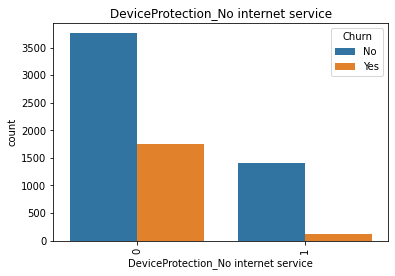

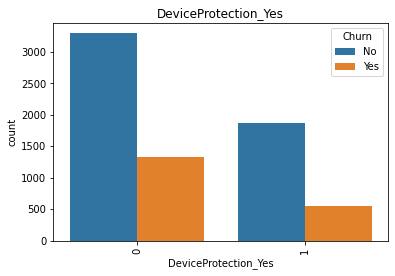

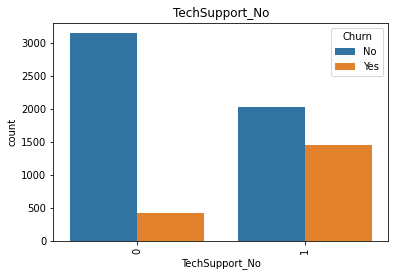

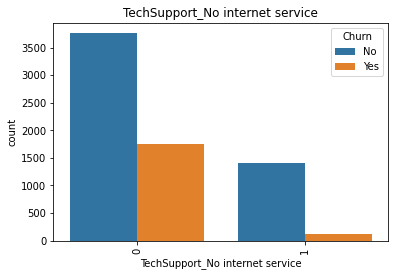

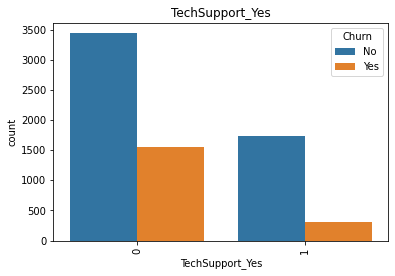

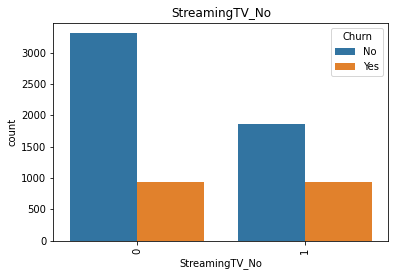

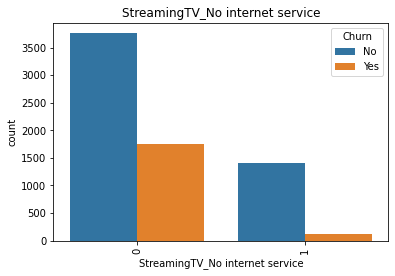

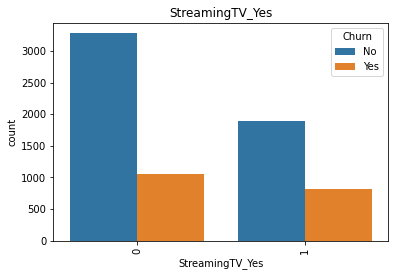

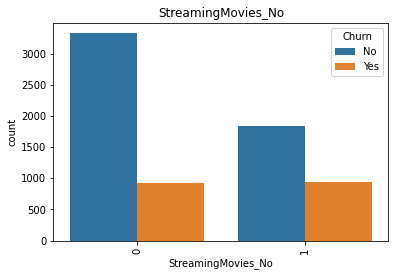

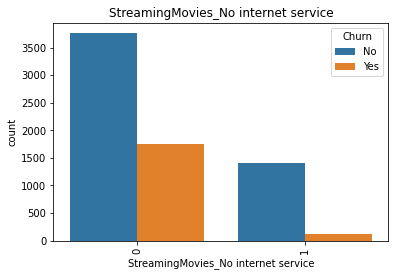

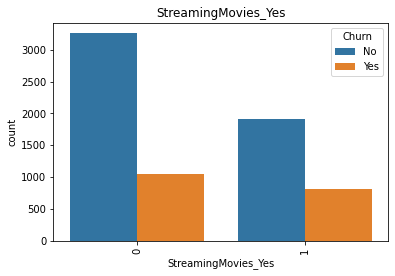

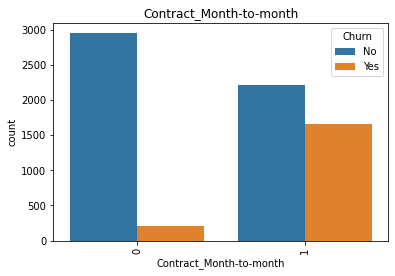

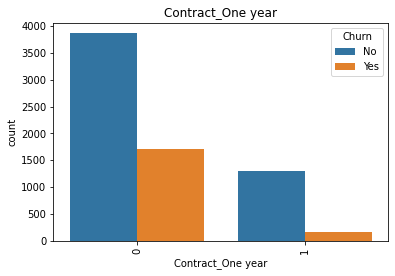

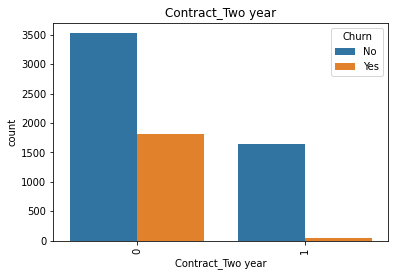

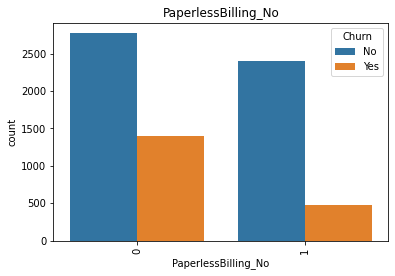

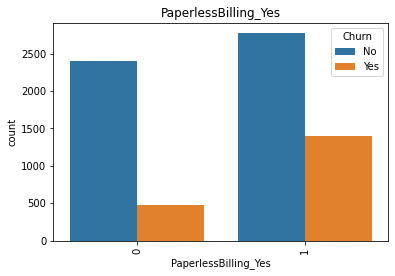

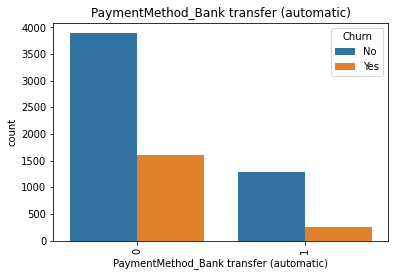

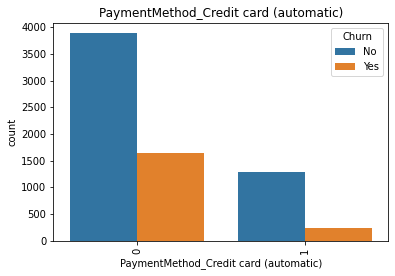

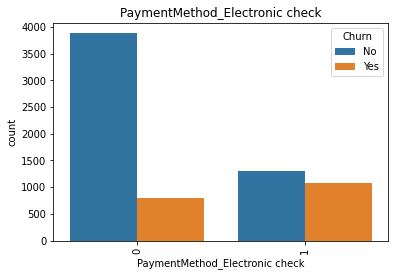

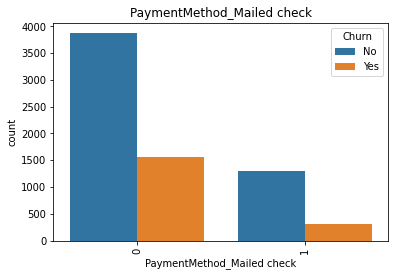

In [ ]:
for col in df.columns:
    if col not in ["customerID", "Churn"]:
        plt.figure()
        sns.countplot(x=col, hue="Churn", data=df)
        plt.title(col)
        plt.xticks(rotation=90)
        plt.legend(title="Churn", labels=["No", "Yes"])
        plt.show()

In [ ]:
#Data Preprocessing
# encoding categorical columns

df = pd.get_dummies(df, columns=categorical_features)

In [ ]:
#Scaling numerical values with standard scaler
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Splitting data into train test
# Defining features and target
X = df.drop(["customerID", "Churn"], axis=1)
y = df["Churn"]
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model Selection and Evaluation
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="Yes"))
print("Recall:", recall_score(y_test, y_pred, pos_label="Yes"))
print("F1 Score:", f1_score(y_test, y_pred, pos_label="Yes"))

Accuracy: 0.8211497515968772
Precision: 0.6850152905198776
Recall: 0.6005361930294906
F1 Score: 0.64


In [ ]:
#Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="Yes"))
print("Recall:", recall_score(y_test, y_pred, pos_label="Yes"))
print("F1 Score:", f1_score(y_test, y_pred, pos_label="Yes"))

Accuracy: 0.71611071682044
Precision: 0.4659949622166247
Recall: 0.4959785522788204
F1 Score: 0.4805194805194805


In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="Yes"))
print("Recall:", recall_score(y_test, y_pred, pos_label="Yes"))
print("F1 Score:", f1_score(y_test, y_pred, pos_label="Yes"))

Accuracy: 0.7885024840312278
Precision: 0.6334519572953736
Recall: 0.4772117962466488
F1 Score: 0.5443425076452599


In [ ]:
# Feature Importance
#We can use the random forest model to determine the most important features in predicting customer churn

importances = rf.feature_importances_

feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)


print(feature_importances)

                                    Feature  Importance
2                              TotalCharges    0.159645
0                                    tenure    0.141807
1                            MonthlyCharges    0.139567
37                  Contract_Month-to-month    0.047920
44           PaymentMethod_Electronic check    0.031343
28                           TechSupport_No    0.028779
19                        OnlineSecurity_No    0.027472
17              InternetService_Fiber optic    0.021793
3                             gender_Female    0.018265
4                               gender_Male    0.017216
40                      PaperlessBilling_No    0.016887
22                          OnlineBackup_No    0.016757
39                        Contract_Two year    0.016745
7                                Partner_No    0.014703
41                     PaperlessBilling_Yes    0.014587
25                      DeviceProtection_No    0.014586
8                               Partner_Yes    0

# Conclusion

Based on the feature importance scores obtained from the model, we can identify the top factors contributing to customer churn. Here are the top factors based on the given feature importance:

From the feature importance provided, we can see that the most important feature in predicting churn is "TotalCharges" with an importance value of 0.16, followed by "tenure" and "MonthlyCharges" with importance values of 0.14 and 0.14 respectively. This suggests that customers who have been with the company longer and are paying more are less likely to churn.

Another important feature is "Contract_Month-to-month" with an importance value of 0.05, suggesting that customers who are on a month-to-month contract are more likely to churn. Similarly, "PaymentMethod_Electronic check" and "PaperlessBilling_Yes" have importance values of 0.03 and 0.01 respectively, indicating that customers who use electronic checks and opt for paperless billing are more likely to churn.

Overall, these results suggest that the company may be losing customers due to factors such as the type of contract, payment methods, and billing options offered. The company may want to consider providing incentives for customers to sign up for longer-term contracts or offering different payment options to reduce churn. Additionally, it may be beneficial to explore why customers on month-to-month contracts and those who opt for electronic checks and paperless billing are more likely to churn and address these issues to improve customer retention.